In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

# 1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [39]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv')
training_set.describe(include=['O'])
training_set.drop('Cabin', axis=1, inplace=True)
training_set.dropna(inplace=True)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])
training_set['Sex'].unique()
np.unique(cat_enc_le)
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy
training_set.shape
cat_enc_ohe.shape
pd.get_dummies(training_set['Sex']).astype(int).head()
pd.get_dummies(training_set['Sex'], drop_first=True)
sex = pd.get_dummies(training_set['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(training_set['Embarked'], drop_first=True).astype(int)
training_set = pd.concat([training_set, sex, embark], axis=1)
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(training_set.iloc[:,1:], training_set.iloc[:,0], test_size=0.33, random_state=42)
clf =  LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

0.7829787234042553

# 2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:

      Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [13]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv')

Text(0.5, 1.0, 'Доля выживших')

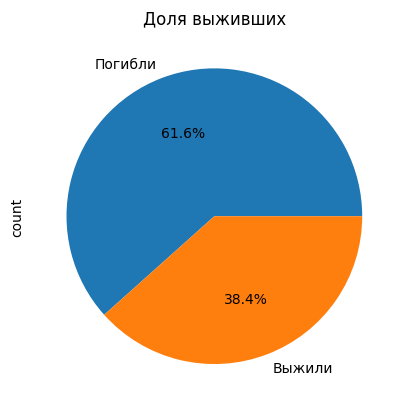

In [14]:
training_set[['Survived']].value_counts().plot.pie(labels = ['Погибли', 'Выжили'],autopct='%1.1f%%' )
plt.title("Доля выживших")

Text(0.5, 1.0, 'Доля женщин и мужчин среди выживших')

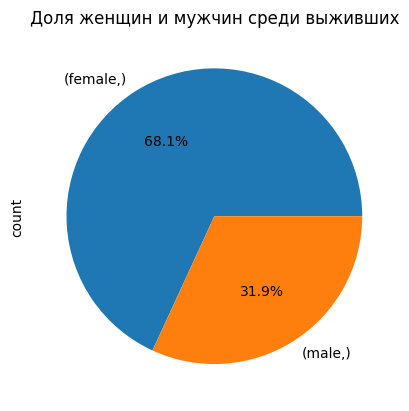

In [15]:
survived = training_set[training_set['Survived'] == 1]
survived[['Sex']].value_counts().plot.pie(autopct='%1.1f%%' )
plt.title("Доля женщин и мужчин среди выживших")




```
Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?
```



Text(0.5, 1.0, 'Доля людей по классам')

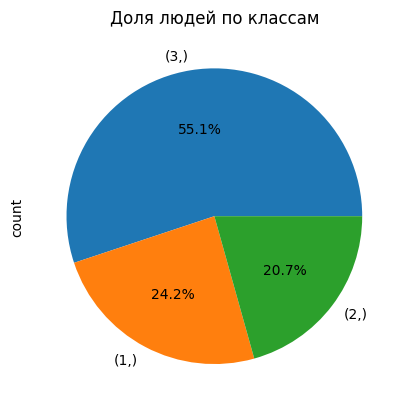

In [16]:
training_set[['Pclass']].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Доля людей по классам")

Text(0.5, 1.0, 'Доля женщин и мужчин среди третьего класса')

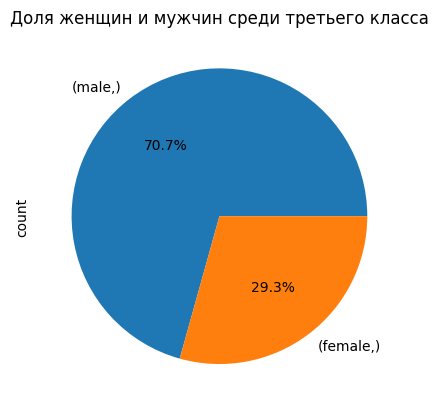

In [17]:
class_3 = training_set[training_set['Pclass'] == 3]
class_3[['Sex']].value_counts().plot.pie(autopct='%1.1f%%' )
plt.title("Доля женщин и мужчин среди третьего класса")



```
Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.
```



In [18]:
training_set.head()
training_set.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

Вывод: Не все столбцы несут важную информацию. Например, нам не нужен столбец с id(просто числа по возрастанию), именем(не влияет на выживаемость), номером биллета(не влияет на выживаемость) и кабиной(там много пустых значений). Эти столбцы удаляем

# 3. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

<Axes: >

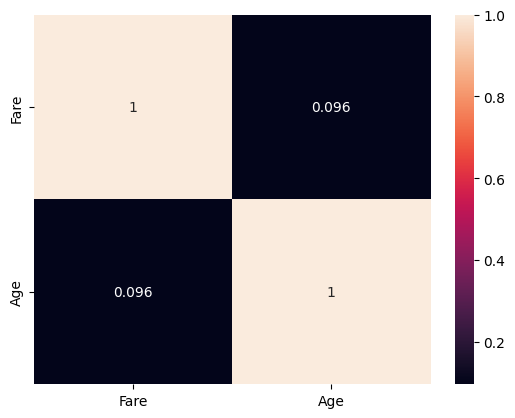

In [19]:
sns.heatmap(training_set[['Fare', 'Age']].corr(), annot=True)

Text(0, 0.5, 'Возраст')

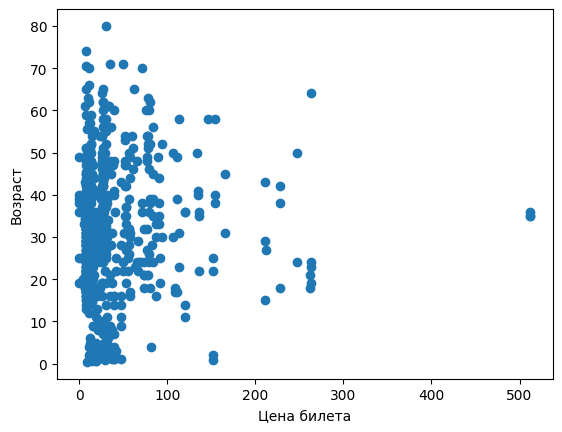

In [20]:
plt.scatter(training_set[['Fare']], training_set[["Age"]])
plt.xlabel("Цена билета")
plt.ylabel("Возраст")

Text(0, 0.5, 'Возраст')

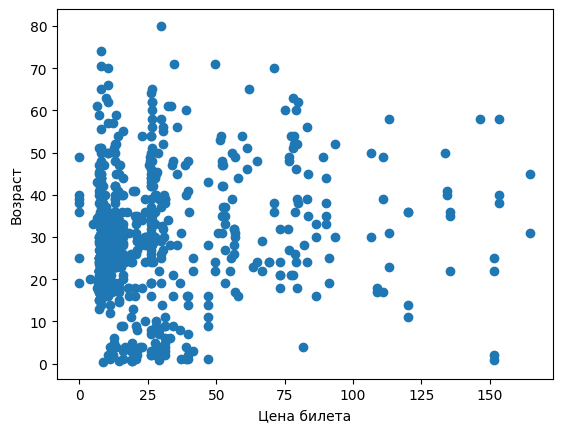

In [21]:
plt.scatter(training_set[training_set['Fare']<200][['Fare']], training_set[training_set['Fare']<200][["Age"]])
plt.xlabel("Цена билета")
plt.ylabel("Возраст")

Корреляция между возрастом и ценой за билет есть, но она низкая. На диаграмме рассетвания видно, что билет по цене более, чем 75, в основном покупают люди в возрасте 20-50 лет

# 4.Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

Text(0.5, 1.0, 'Доля по классам среди выживших')

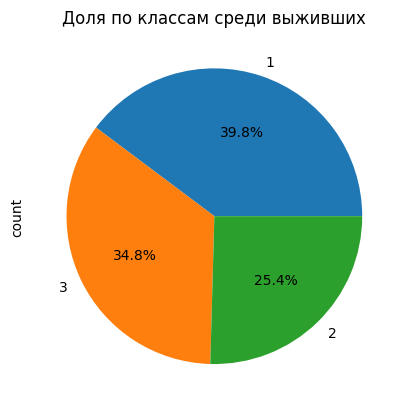

In [22]:
survived = training_set[training_set['Survived'] == 1]
survived['Pclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Доля по классам среди выживших")

Вывод: большинство выживших ехали в первом классе с более дорогими билетами

Text(0.5, 1.0, 'Число выживших в каждом классе')

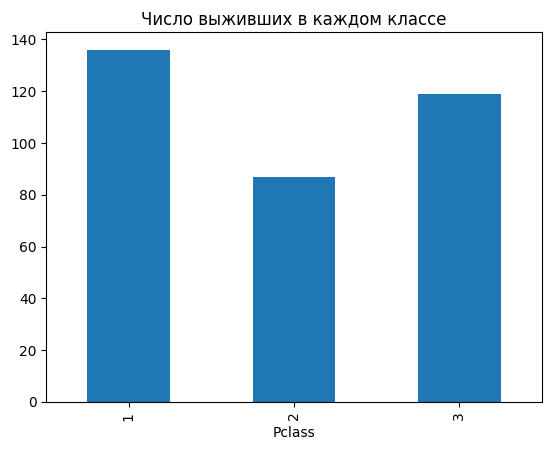

In [23]:
training_set.groupby(['Pclass'])['Survived'].sum().plot.bar()
plt.title("Число выживших в каждом классе")

Вывод: В первом классе выжило больше человек, чем в остальных, но это може быть свзано с тем, что там больше людей ехало. Таким образом, скорее всего зависимость между выживаемостью и классами есть

5. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [24]:
print("Min =" , training_set.Fare.min())
print("Max =" , training_set.Fare.max())
print("Mean =" , training_set.Fare.mean())

training_set.groupby(['Embarked'])['Fare'].mean()

Min = 0.0
Max = 512.3292
Mean = 32.204207968574636


Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

6. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

Text(0.5, 1.0, 'Цены из города C')

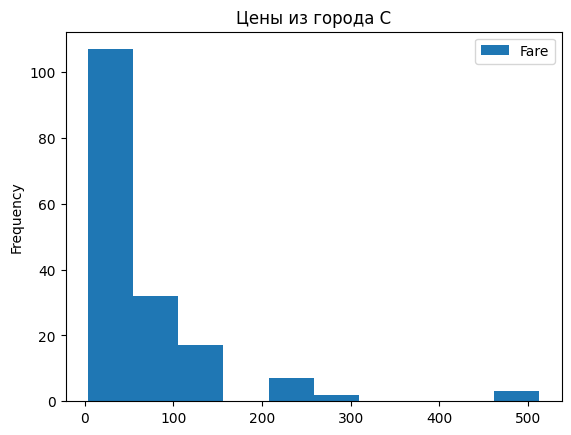

In [25]:
training_set[training_set['Embarked'] == 'C'][['Fare']].plot.hist()
plt.title("Цены из города C")

Text(0.5, 1.0, 'Цены из города S')

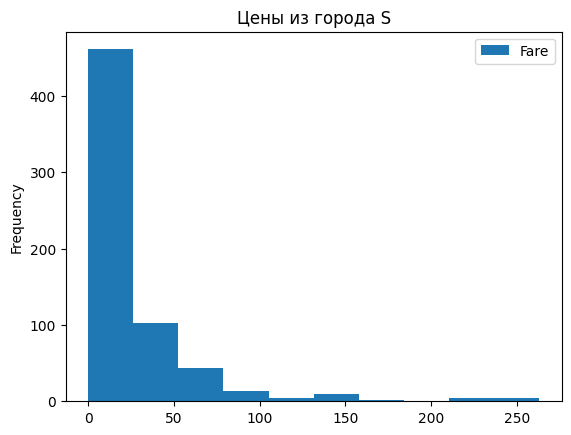

In [26]:
training_set[training_set['Embarked'] == 'S'][['Fare']].plot.hist()
plt.title("Цены из города S")

Text(0.5, 1.0, 'Цены из города Q')

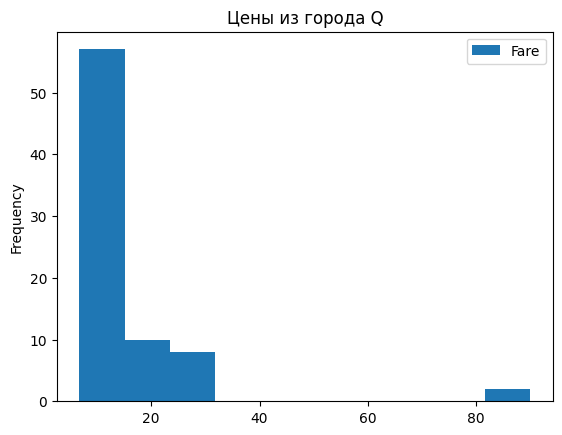

In [27]:
training_set[training_set['Embarked'] == 'Q'][['Fare']].plot.hist()
plt.title("Цены из города Q")

7.Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

In [28]:
print("Всего пассажиров Титаника = ", training_set.shape[0])
print("Выжило = ", training_set['Survived'].sum())

print("Доля выборки от генеральной совокупности", 712/891*100)

Всего пассажиров Титаника =  891
Выжило =  342
Доля выборки от генеральной совокупности 79.91021324354658


8.Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

<Axes: ylabel='Frequency'>

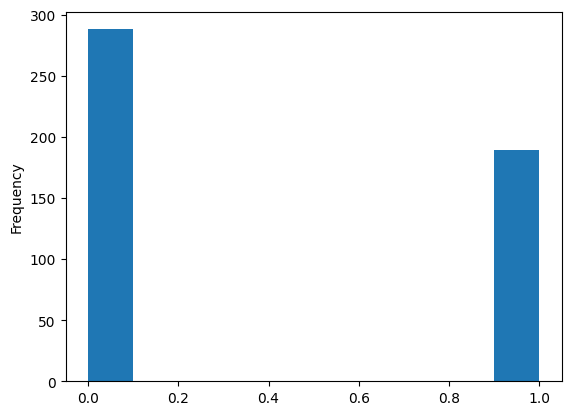

In [30]:
y_train.plot.hist()


<Axes: ylabel='Frequency'>

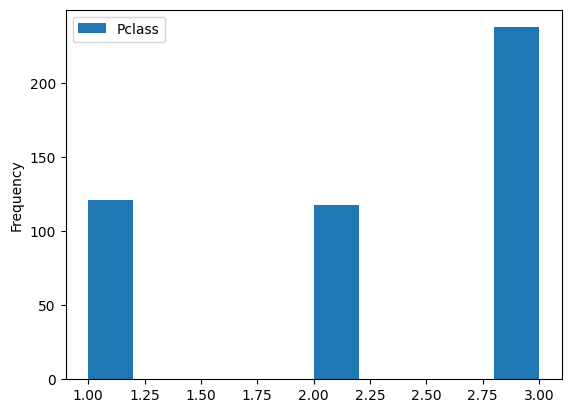

In [31]:
X_train[['Pclass']].plot.hist()

9.Сбалансируйте классы в исходном датасете двумя способами:


```
Удалите лишние объекты мажоритарного класса (выбранные случайно)
```



In [32]:
data_modif = training_set
data_modif[['Survived']].value_counts()[0] - data_modif[['Survived']].value_counts()[1]

to_drop = data_modif[data_modif['Survived'] == 0].sample(n=136, random_state=1)  # Удалить 136

data_modif_drop = data_modif.drop(to_drop.index)
data_modif_drop[['Survived']].value_counts()

Survived
0           413
1           342
Name: count, dtype: int64



```
Добавьте в выборку дубликаты миноритарного класса.
```





In [33]:
to_add = data_modif[data_modif['Survived'] == 1].sample(n=136, random_state=20)
data_modif_add = pd.concat([data_modif,to_add], ignore_index=True)
data_modif_add = data_modif_add.reset_index(drop=True)

data_modif_add[['Survived']].value_counts()

Survived
0           549
1           478
Name: count, dtype: int64

Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

<Axes: >

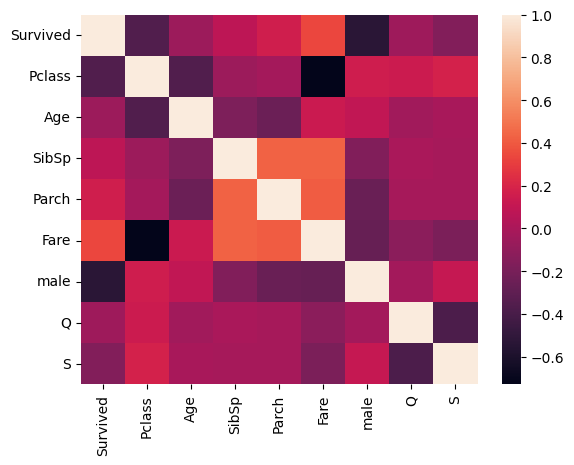

In [40]:
sns.heatmap(training_set.corr(method='spearman'))

Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

In [41]:
def categorize_age(age):
    if age < 18:
        return 'ребенок'
    elif age < 60:
        return 'взрослый'
    else:
        return 'старик'
data_modif_add['ВозрастГруппа'] = data_modif_add['Age'].apply(categorize_age)
data_modif_add.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ВозрастГруппа
0,0,3,male,22.0,1,0,7.2500,S,взрослый
1,1,1,female,38.0,1,0,71.2833,C,взрослый
2,1,3,female,26.0,0,0,7.9250,S,взрослый
3,1,1,female,35.0,1,0,53.1000,S,взрослый
4,0,3,male,35.0,0,0,8.0500,S,взрослый


Text(0.5, 1.0, 'Число выживших по возрасту')

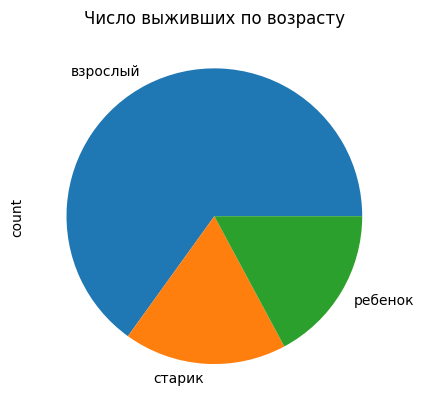

In [42]:
data_modif_add[data_modif_add['Survived'] == 1]['ВозрастГруппа'].value_counts().plot.pie()
plt.title("Число выживших по возрасту")